In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as stats

In [2]:
data = pd.read_csv("../outputs/summary_data.csv")
data = data.loc[
    ~data.isnull().any(axis=1),
]

labels = [
    "gs_score",
    "justice_gs_score_mean",
    "justice_gs_score_std",
    "justice_year_gs_score_mean",
    "justice_year_gs_score_std",
]
features = [
    "word_count",
    "duration",
    "pitch_log_diff_variance",
    "pitch_log_mean",
    "pitch_log_stdev",
    "pitch_log_2pct",
    "pitch_log_25pct",
    "pitch_log_50pct",
    "pitch_log_75pct",
    "pitch_log_98pct",
    "onset_count",
    "onset_str_mean",
    "onset_str_stddev",
    "onset_str_entropy",
    "onset_time_diff_mean",
    "onset_time_diff_stddev",
    "onset_time_diff_entropy",
    "word_rate",
    "onset_rate",
    "justice_word_count_mean",
    "justice_word_count_std",
    "justice_duration_mean",
    "justice_duration_std",
    "justice_pitch_log_diff_variance_mean",
    "justice_pitch_log_diff_variance_std",
    "justice_pitch_log_mean_mean",
    "justice_pitch_log_mean_std",
    "justice_pitch_log_stdev_mean",
    "justice_pitch_log_stdev_std",
    "justice_pitch_log_2pct_mean",
    "justice_pitch_log_2pct_std",
    "justice_pitch_log_25pct_mean",
    "justice_pitch_log_25pct_std",
    "justice_pitch_log_50pct_mean",
    "justice_pitch_log_50pct_std",
    "justice_pitch_log_75pct_mean",
    "justice_pitch_log_75pct_std",
    "justice_pitch_log_98pct_mean",
    "justice_pitch_log_98pct_std",
    "justice_onset_count_mean",
    "justice_onset_count_std",
    "justice_onset_str_mean_mean",
    "justice_onset_str_mean_std",
    "justice_onset_str_stddev_mean",
    "justice_onset_str_stddev_std",
    "justice_onset_str_entropy_mean",
    "justice_onset_str_entropy_std",
    "justice_onset_time_diff_mean_mean",
    "justice_onset_time_diff_mean_std",
    "justice_onset_time_diff_stddev_mean",
    "justice_onset_time_diff_stddev_std",
    "justice_onset_time_diff_entropy_mean",
    "justice_onset_time_diff_entropy_std",
    "justice_word_rate_mean",
    "justice_word_rate_std",
    "justice_onset_rate_mean",
    "justice_onset_rate_std",
    "justice_year_word_count_mean",
    "justice_year_word_count_std",
    "justice_year_duration_mean",
    "justice_year_duration_std",
    "justice_year_pitch_log_diff_variance_mean",
    "justice_year_pitch_log_diff_variance_std",
    "justice_year_pitch_log_mean_mean",
    "justice_year_pitch_log_mean_std",
    "justice_year_pitch_log_stdev_mean",
    "justice_year_pitch_log_stdev_std",
    "justice_year_pitch_log_2pct_mean",
    "justice_year_pitch_log_2pct_std",
    "justice_year_pitch_log_25pct_mean",
    "justice_year_pitch_log_25pct_std",
    "justice_year_pitch_log_50pct_mean",
    "justice_year_pitch_log_50pct_std",
    "justice_year_pitch_log_75pct_mean",
    "justice_year_pitch_log_75pct_std",
    "justice_year_pitch_log_98pct_mean",
    "justice_year_pitch_log_98pct_std",
    "justice_year_onset_count_mean",
    "justice_year_onset_count_std",
    "justice_year_onset_str_mean_mean",
    "justice_year_onset_str_mean_std",
    "justice_year_onset_str_stddev_mean",
    "justice_year_onset_str_stddev_std",
    "justice_year_onset_str_entropy_mean",
    "justice_year_onset_str_entropy_std",
    "justice_year_onset_time_diff_mean_mean",
    "justice_year_onset_time_diff_mean_std",
    "justice_year_onset_time_diff_stddev_mean",
    "justice_year_onset_time_diff_stddev_std",
    "justice_year_onset_time_diff_entropy_mean",
    "justice_year_onset_time_diff_entropy_std",
    "justice_year_word_rate_mean",
    "justice_year_word_rate_std",
    "justice_year_onset_rate_mean",
    "justice_year_onset_rate_std",
]

In [12]:
X = data[features]
y = data["gs_score"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)
y_weights = np.log1p(1/stats.norm.pdf(y_train, y_train.mean(), y_train.std()))

NameError: name 'stats' is not defined

In [4]:
params = {
    "n_estimators": 1000,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train, )

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.2965


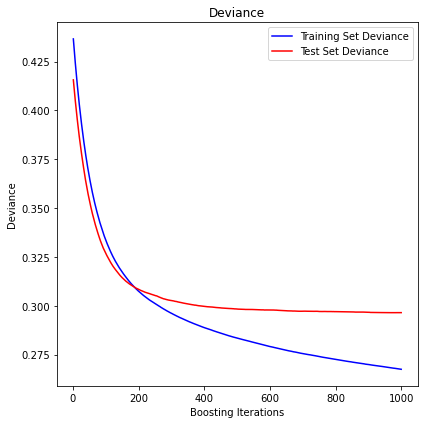

In [5]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [6]:
feat_imp = pd.DataFrame(
    list(zip(features, reg.feature_importances_)), columns=["feature", "importance"]
)
feat_imp = feat_imp.sort_values("importance", ascending=False)
feat_imp.loc[feat_imp["importance"] > 0]

,feature,importance
0,word_count,0.465085
17,word_rate,0.134013
75,justice_year_pitch_log_98pct_mean,0.060196
3,pitch_log_mean,0.030790
9,pitch_log_98pct,0.029203
...,...,...
50,justice_onset_time_diff_stddev_std,0.000105
20,justice_word_count_std,0.000079
69,justice_year_pitch_log_25pct_mean,0.000028
44,justice_onset_str_stddev_std,0.000016


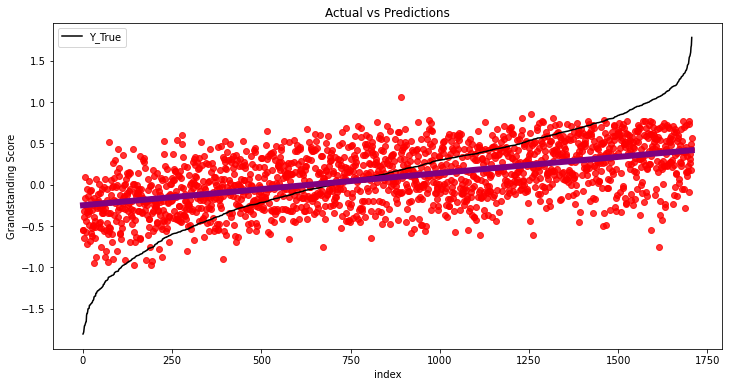

In [10]:
preds = reg.predict(X_test)
pred_df = pd.DataFrame(data={"y_true": y_test, "y_pred": preds})

pred_df = pred_df.sort_values("y_true").reset_index(drop=True)
pred_df = pred_df.reset_index(drop=False)

figure, ax = plt.subplots(ncols=1, figsize=(12, 6))
g = sns.lineplot(
    x="index", y="y_true", data=pred_df, alpha=1, label="Y_True", color="k"
)
g = sns.regplot(
    x="index",
    y="y_pred",
    data=pred_df,
    label="Y_Pred",
    color="red",
    line_kws={"color": "purple", "linewidth": 6, "label": "Learned Trend"},
)
plt.title("Actual vs Predictions")
plt.ylabel("Grandstanding Score")
plt.show()

In [11]:
from scipy.stats import linregress
slope, intercept, r, p, se = linregress(pred_df["y_true"], pred_df["y_pred"])
print(f"R-squared: {r**2:.6f}")

R-squared: 0.290198


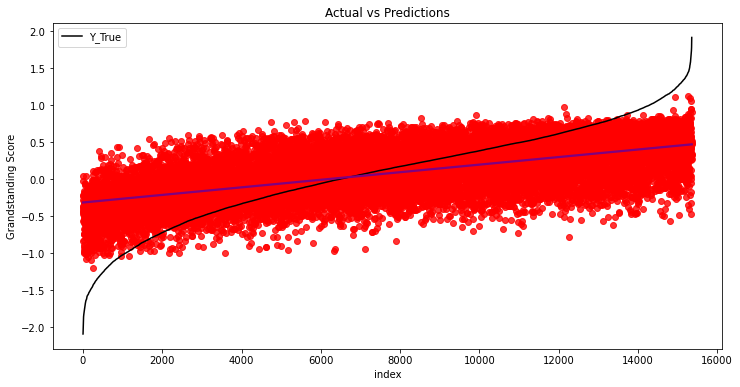

In [8]:
preds = reg.predict(X_train)
pred_df = pd.DataFrame(data={"y_true": y_train, "y_pred": preds})

pred_df = pred_df.sort_values("y_true").reset_index(drop=True)
pred_df = pred_df.reset_index(drop=False)

figure, ax = plt.subplots(ncols=1, figsize=(12, 6))
g = sns.lineplot(
    x="index", y="y_true", data=pred_df, alpha=1, label="Y_True", color="k"
)
g = sns.regplot(
    x="index",
    y="y_pred",
    data=pred_df,
    label="Y_Pred",
    color="red",
    line_kws={"color": "purple"},
)
plt.title("Actual vs Predictions")
plt.ylabel("Grandstanding Score")
plt.show()